<a href="https://colab.research.google.com/github/FatemehAbediK/machine-learning-general/blob/main/Regression_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#linear regression


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , log_loss

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df=pd.read_csv('/content/drive/MyDrive/dataset files/Housing.csv' )

In [7]:
df.head(4)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [16]:
cols_to_convert = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning' , 'prefarea' , 'furnishingstatus']
df[cols_to_convert] = df[cols_to_convert].replace({'yes': 1, 'no': 0})

In [17]:
df.head(4)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished


In [19]:
df.drop('furnishingstatus' , axis=1 , inplace=True)

In [20]:
x=df.drop('price' , axis=1)
y=df['price']

In [21]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)


In [22]:
print(x_train.shape , y_train.shape , x_test.shape , y_test.shape)

(436, 11) (436,) (109, 11) (109,)


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lr=LinearRegression()
lr.fit(x_train , y_train)

print(lr.coef_  )      ##coefficient(w)
print(lr.intercept_)   ##interception(b)



[2.37558387e+02 9.75335435e+04 1.02750197e+06 4.69064034e+05
 4.65222027e+05 1.75429276e+05 4.66693310e+05 1.05533239e+06
 9.43166179e+05 3.01971912e+05 6.27105315e+05]
-241609.4408140313


In [29]:
y_pred = lr.predict(x_test)

mse=metrics.mean_squared_error(y_test , y_pred)
rmse=np.sqrt(mse)

print(f'rmse : {rmse}')

rmse : 1073458.0400659596


#preprocessing

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)

x_train_scaler=scaler.transform(x_train)
x_test_scaler=scaler.transform(x_test)


#Gradient decent(GD)

In [33]:
from sklearn.linear_model import SGDRegressor


gd_reg=SGDRegressor(max_iter=100,eta0=0.001)
gd_reg.fit(x_train , y_train)

y_pred_gd_reg=gd_reg.predict(x_test_scaler)

mse_gd=metrics.mean_squared_error(y_test , y_pred_gd_reg)
rmse_gd=np.sqrt(mse_gd)

print(f'rmse : {rmse_gd}')

rmse : 588361497588.0448


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# compare rmse , rmse_gd

#Polynominal regression


In [34]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [37]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2,include_bias= True)

x_poly=poly.fit_transform(x)
x_train_poly ,  x_test_poly , y_train_poly , y_test_poly = train_test_split(x_poly,y,test_size=0.2)


In [39]:
poly_model=LinearRegression()
poly_model.fit(x_train_poly , y_train_poly)

print(poly_model.coef_ )       ##coefficient(w)
print(poly_model.intercept_)    ##interception(b)


[ 1.60280484e+12  4.19006937e+02  2.71411727e+05  8.51377405e+04
  1.17759397e+05 -8.48613157e+05  6.90799573e+05 -1.83465836e+04
 -1.93832140e+06 -1.33521773e+04 -2.14977041e+05 -1.35823676e+06
 -3.38020016e-02  4.66827385e+00 -5.96122321e+00 -4.14920398e+01
  2.26602735e+02 -3.97658568e+02  1.87528620e+02 -2.65286937e+02
 -5.56150800e+00  8.31646782e+01  5.83973992e+01 -7.67981961e+04
  3.97388521e+04  1.13598063e+05  1.41572206e+05  2.72340184e+05
  6.39510944e+04  1.93335456e+06  4.28082036e+02 -6.99575198e+04
 -1.22356749e+05 -1.36760100e+04 -3.10780903e+04  4.12435977e+05
 -1.50908132e+04 -3.41275511e+04  4.22457168e+04  4.81954581e+05
  1.89249722e+05  5.23017510e+05 -2.10774312e+04  2.02442661e+05
 -3.77726176e+05 -9.98364924e+04 -1.78194951e+06  1.67427029e+05
  7.60692883e+04  2.78990033e+05 -8.48613157e+05  1.00998641e+06
 -3.92878448e+05  3.21398111e+06 -5.59957999e+05  3.09052069e+05
  2.51624211e+06  6.90799573e+05 -3.46566587e+05 -2.72851045e+06
  6.21954158e+05  2.43964

In [43]:
y_pred_poly = poly_model.predict(x_test_poly)
mse_poly=metrics.mean_squared_error(y_test_poly , y_pred_poly)
rmse_poly=np.sqrt(mse_poly)

print(f'rmse_poly : {rmse_poly}')

rmse_poly : 1532907.6669974595


In [ ]:
# compare rmse , rmse_poly

#now different degrees for poly!

In [44]:
train_rmse_list=[]
test_rmse_list=[]

for degree in range(1,10):

  poly=PolynomialFeatures(degree=degree,include_bias= True)
  x_poly=poly.fit_transform(x)

  x_train_poly ,  y_train_poly , x_test_poly , y_test_poly = train_test_split(x_poly,y,test_size=0.2)

  poly_model=LinearRegression()
  poly_model.fit(x_train , y_train)

  y_pred_poly_train = poly_model.predict(x_train)
  y_pred_poly_test = poly_model.predict(x_test)

  rmse_train=np.sqrt(metrics.mean_squared_error (y_train ,y_pred_poly_train ))
  rmse_test=np.sqrt(metrics.mean_squared_error (y_test ,y_pred_poly_test ))

  train_rmse_list.append(rmse_train)
  test_rmse_list.append(rmse_test)

print(train_rmse_list)
print(test_rmse_list)


[1070699.5674342837, 1070699.5674342837, 1070699.5674342837, 1070699.5674342837, 1070699.5674342837, 1070699.5674342837, 1070699.5674342837, 1070699.5674342837, 1070699.5674342837]
[1073458.0400659596, 1073458.0400659596, 1073458.0400659596, 1073458.0400659596, 1073458.0400659596, 1073458.0400659596, 1073458.0400659596, 1073458.0400659596, 1073458.0400659596]


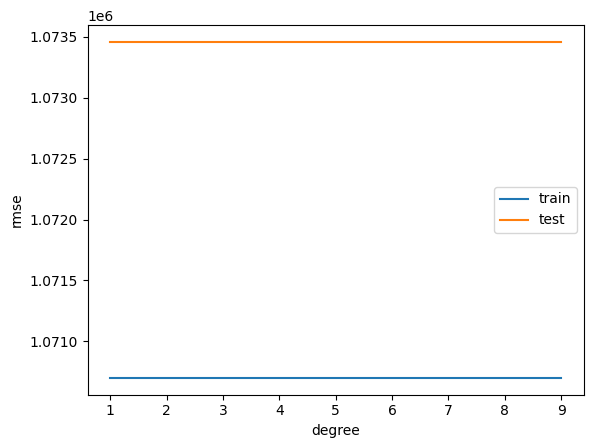

In [46]:
import matplotlib.pyplot as plt

plt.plot(range(1,10) , train_rmse_list , label="train")
plt.plot(range(1,10) , test_rmse_list , label="test")
plt.xlabel('degree')
plt.ylabel("rmse")
plt.legend()
plt.show();